# Predicting The Past
-----------------------------------------------------------------------------------------------------------------------------
*Welcome to the third part of the project. In the [first part](https://github.com/nikosga/theHobbyist/blob/master/thesis%20project/Part%201__Data%20Cleaning.ipynb) two datasets were created. The first one was used for the [second part](https://github.com/nikosga/theHobbyist/blob/master/thesis%20project/Part%202__Regression%20Techniques.ipynb) of the project and the second dataset is tailored for the needs of this part. The obstacle we had to overcome with the second dataset was the fact that while some features were appearing in some years, they were absent in others (full of NAs). The problem was solved by keeping the features that were common in all years from 1990-2014. As you probably have guessed by now, the target is to predict the happiness levels of people from different countries all the way back to 1990. But why 1990? Why not even farther? The reason is that as years go by, the prediction moves farther from the truth. In our case happiness is a subjective variable. That means people were asked how they feel and each one makes different sense of happiness. Of course when the responses are aggregated the result can be considered liable as psychologists argue. There are others who believe the [opposite](http://happierhuman.com/measuring-happiness/). But no matter what everyone believes no one can argue that variables play the same role in all years. For example one variable causing problems is the % of internet users. Now we don't have data from happiness in the 90's but I am not willing to assume that people were miserable in the 70's or 60's because they didn't have Facebook or Tinder. Surely, this variable can be used as an instrument for gdp or access to education, but only in the time period it exists. Another problem is the fact that as we move in the past even more data are missing and that will drop the prediction power even more. As you were reading I was charging the time machine. It's now ready so sit back and enjoy... *

In [1]:
#Importing modules and data
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("C:\\Users\\nikos\\Desktop\\thesisdata\\2005to2014train.csv")
test = pd.read_csv("C:\\Users\\nikos\\Desktop\\thesisdata\\1990to2004test.csv")

In [2]:
trainset = train[(train.Year==2014) | (train.Year==2012)| (train.Year==2010)
                | (train.Year==2008) | (train.Year==2006)]
crossvalset = train[(train.Year==2005) | (train.Year==2007) | (train.Year==2009)
                  | (train.Year==2011) | (train.Year==2013)]

As mentioned earlier Internet users should be removed from the equation. 

In [3]:
internet = 'Internet users (per 100 people)'
Xtrain = trainset.drop(["Country","Life Ladder",internet,"Year"],axis=1)
Xcrossval = crossvalset.drop(["Country","Life Ladder",internet,"Year"],axis=1)
Xtest = test.drop(["Country",internet,"Year"],axis=1)
ytrain = trainset.iloc[:,1]
ycrossval = crossvalset.iloc[:,1]
#The model
params = {'n_estimators': 2000, 'max_depth': 2, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls','random_state':2}
clf = GradientBoostingRegressor(**params)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xcrossval)
r2_score(ycrossval, ypred)

0.86726231833069012

Question : _"Does global happiness change over time?"_

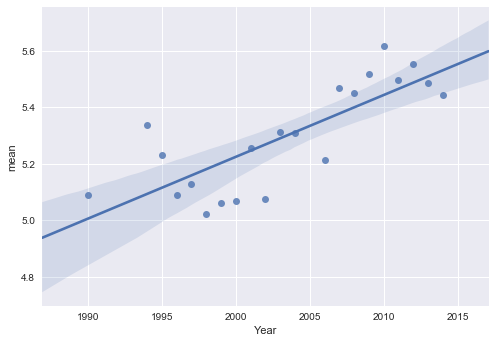

In [4]:
#the prediction
prediction = clf.predict(Xtest)
yy = train.iloc[:,1]
truedf=pd.DataFrame([yy,train.Year,train.Country]).transpose().dropna()
truedf = truedf.rename(columns={'Life Ladder':'value'})
truedf['type'] = 'true'
preddf=pd.DataFrame([prediction,test.Year,test.Country]).transpose().dropna()
preddf = preddf.rename(columns={0:'value',1:'Year',2:'Country'})
preddf['type'] = 'predicted'
seriesdf = pd.concat([truedf,preddf])
seriesdf = seriesdf.sort_values("Year")
list1 =[]
for year in range(1990,2015):
    list1.append(seriesdf.value[seriesdf.Year==year].mean())
globalhappy = pd.DataFrame()
globalhappy["mean"]=list1
globalhappy["Year"]=set(seriesdf.Year)
ncount = []
for year in range(1990,2015):
    ncount.append(seriesdf[seriesdf.Year==year].shape[0])
globalhappy["ncountries"] = ncount
sns.regplot(x="Year",y="mean",data=globalhappy[(globalhappy.ncountries>60)])

The first comment will be on the slope. People are getting happier and this is expected since variables that indicate well-being contribute possitively to that end. ![](https://upload.wikimedia.org/wikipedia/commons/d/db/International-development.gif)

The second comment has to do with the fact that there seems to exist a form of cyclicality. Now this statement cannot be supported from this dataset since most of the data points are predictions and not the real values but still seems like an interesting point. Finishing our analysis let's take a look at the predicted happiness for some European countries. In the following plot the points from 2005 and later are the true values, while the previous points are predictions. 

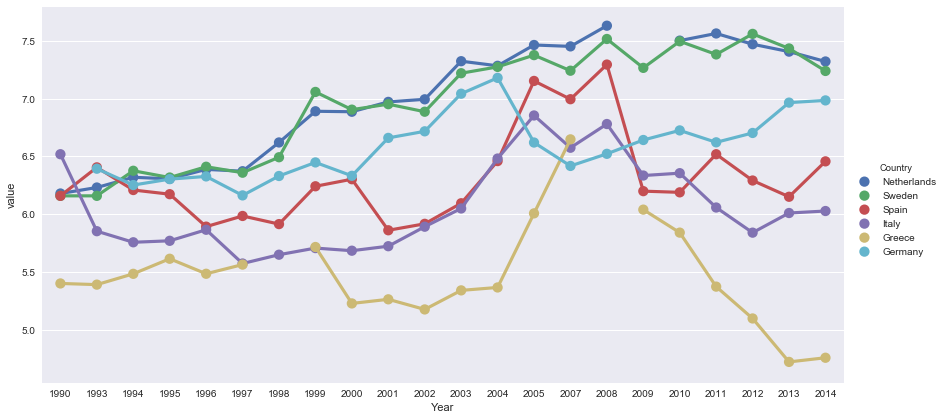

In [5]:
#plotting the final results
yy = train.iloc[:,1]
truedf=pd.DataFrame([yy,train.Year,train.Country]).transpose().dropna()
truedf = truedf.rename(columns={'Life Ladder':'value'})
truedf['type'] = 'true'
preddf=pd.DataFrame([prediction,test.Year,test.Country]).transpose().dropna()
preddf = preddf.rename(columns={0:'value',1:'Year',2:'Country'})
preddf['type'] = 'predicted'
seriesdf = pd.concat([truedf,preddf])
seriesdf = seriesdf.sort_values("Year")
sns.factorplot(data=seriesdf.loc[(seriesdf.Country=="Greece")
                               | (seriesdf.Country=="Sweden")
                               | (seriesdf.Country=="Germany")
                               | (seriesdf.Country=="Spain")
                               | (seriesdf.Country=="Netherlands")
                               | (seriesdf.Country=="Italy")], x='Year', y='value',hue="Country",size=6,aspect=2)

# _The end_
-----------------------------------------------------------------------------------------------------------------------------